**Single Bandit Model**

Here we will examine the behavior of a single slot machine, also known as a bandit.  The behavior of the bandit will be modeled as sequential draws from a random number generator with a specified probability distribution.  These random numbers are transformed to a normal, or Gaussian, distribution that is characterized by a mean, mu or $\mu$, and a standard deviation, sigma or $\sigma$.  Remember that the square of the standard deviation is the variance, denoted $\sigma^2$. 

From a statistical point of view, we have a mean and a variance of the sample, and a mean and a variance associated with the underlying probability distribution.  The mean of the sample is denoted, $\bar{x}$, and the mean of the population is denoted as $\mu$.  Similarily, the variance of the of the sample is denoted as, $s^2$, while the variance of the population is, $\sigma^2$.

__In the cell below set your working directory, if needed__

In [7]:
# import os
# os.getcwd() # gets current working directory, if needed
# os.chdir("/Users/dhart/work/myRL/MultiArmedBandit")

__In the cell below set__

* N - the number of data points to generate
* mu - the mean of the generated random numbers
* sigma - the standard deviation of the generated random numbers
* seed - choose an integer number, e.g., 12345, for a repeatable sequence of random numbers, None uses the system time as a seed for the random number generator

Random numbers are geneated for a normal distribution with mean equal to mu and standard deviation equal to sigma.  See line 17 in the file bandit.py in the function _play_.

In [8]:
%matplotlib inline
seed = None
N = 10000
mu = 1
sigma = 10

__In the cell below the single bandit experiment is run.__  

1. The first plot shows that data that were generated from the randon number generator on the y-axis.  The x-axis is the iteration count.  Observe that the data are centrally located about the mean of the distribution.

2. The second plot contains an incremental calculation of the mean of the data.  For example, the first number is the mean of the first number.  The second number is the mean of the first two numbers, and the 10 number is the mean of the first 10 numbers.  Observe the rate at which the estimated mean converges to the true mean.

3. The third plot show the incremental calculation of the variance of the sample

4. The fourth plot show the incremental calculation of the estimated variance of the population

5. The fifth plot shows the incremental mean calculation again.  However, note that the x-axis is now on a logarithmic scale.  This allows one to see details of the early iterations of the caluclation.

6. The sixth plot is the incremental calculation of the variance of the sample on a logrithmic scale.

7. The seventh plot is the incremental calculation of the estimated population variance on a logarithmic scale.


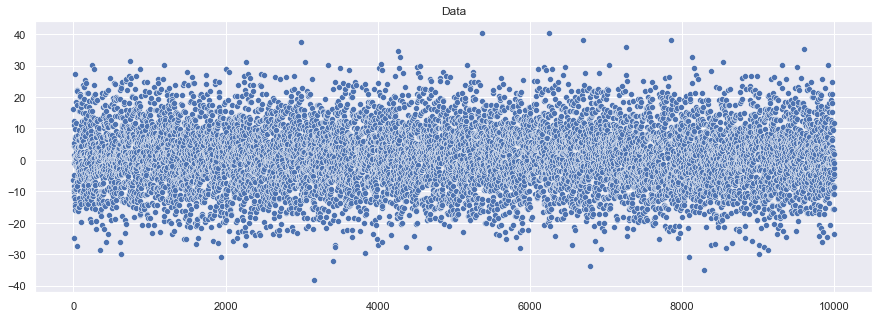

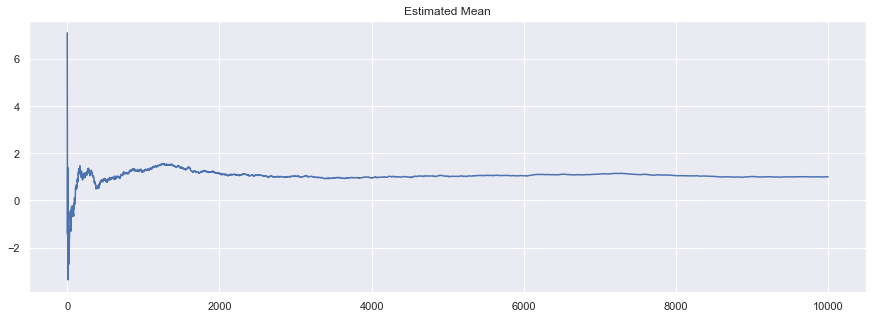

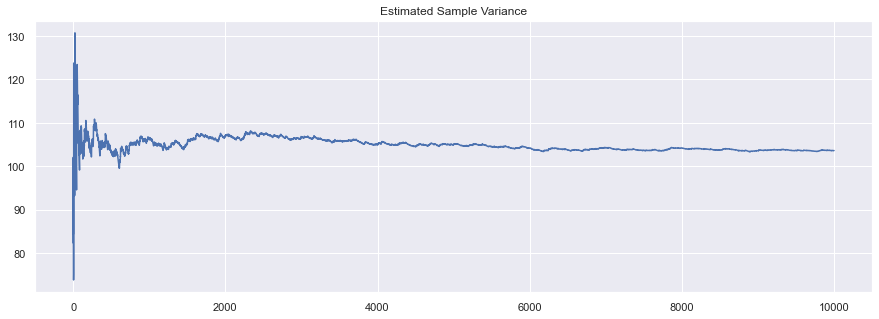

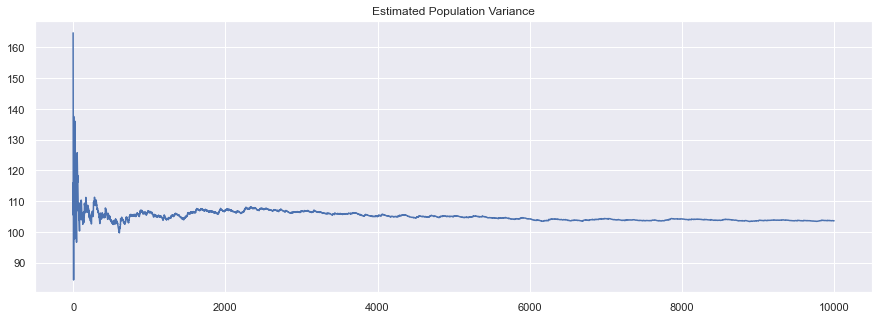

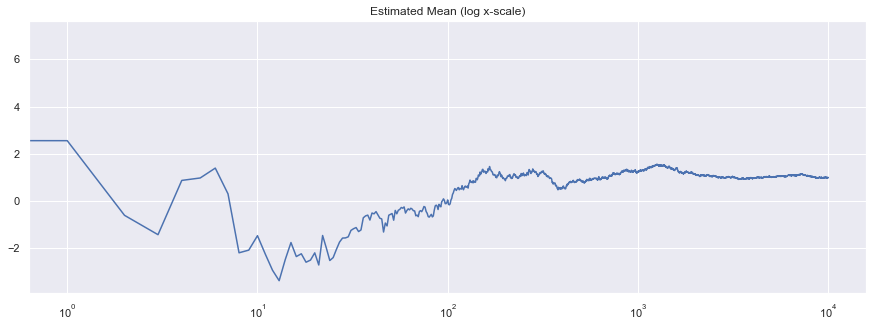

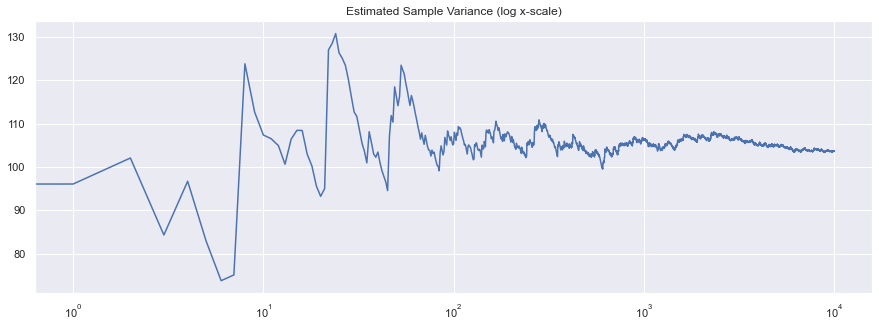

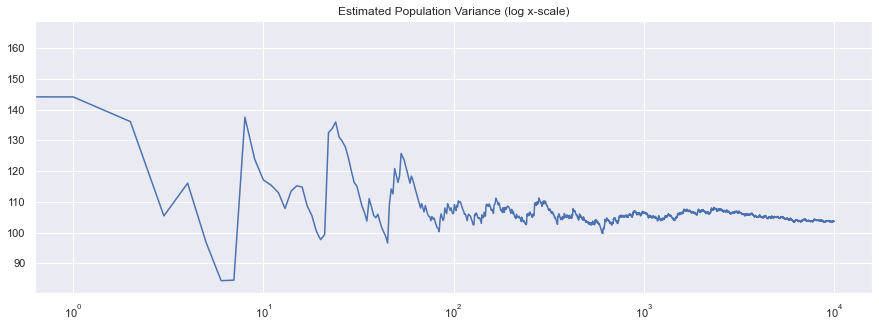

In [9]:
from run_experiment1 import run_experiment

run_experiment(mu, sigma, N)

**Online Mean Computation**

Suppose that we have an online source of data and we wish to compute mean values.  However, there is not enough storage to save all the data.  We desire a method to take a current value of a mean and update it sequentially when new data arrives.

Define $m_n$ to be the mean of the first $n$ data points.  Then

$$
m_n = \frac{1}{n} \sum_{i=1}^n x_i
$$

where $x_i$ is the $i$th data point. Then

$$
m_n = \frac{1}{n} \sum_{i=1}^n x_i = \frac{n-1}{n(n-1)} (\sum_{i=1}^{n-1}x_i + x_n) = 
\frac{n-1}{n} (\frac{1}{n-1} \sum_{i=1}^{n-1}x_i) + \frac{1}{n}x_n
$$
the term in the parenthesis on the right hand side is the mean of the first $n-1$ items.  Consequently

$$
m_n = \frac{n-1}{n} m_{n-1} + \frac{1}{n}x_n
$$

The next sequential estimate of the mean, $m_n$, is a function of 
* the value of the current data point $x_n$
* the previsous estimate of the mean $m_{n-1}$
* and the number of data points $n$

**Online Standard Deviation Computation**

Welford (1962) derived the equations for the incremental online update of the mean, variance of the sample, and variance of the population estimate, as well as higher order moments of the probability distribution as shown below

***(1) incremental online mean computation***
$$
\bar{x}_n = \frac{(n-1)\,\bar{x}_{n-1} + x_n}{n} = 
\bar{x}_{n-1} + \frac{x_n - \bar{x}_{n-1}}{n}
$$

***(2) incremental online sample variance online*** 
$$
s_n^2 = \frac{n-2}{n-1}\:s_{n-1}^2 + \frac{(x_n-\bar{x}_{n-1})^2}{n} = 
s_{n-1}^2 + \frac{(x_n - \bar{x}_{n-1})^2}{n} - \frac{s_{n-1}^2}{n-1}. \; n>1
$$

***(3) incremental online population variance computation***
$$
\sigma_n^2 = \frac{(n-1)\sigma_{n-1}^2 + (x_n-\bar{x}_{n-1})(x_n-\bar{x}_n)}{n} = 
\sigma_{n-1}^2 + \frac{(x_n-\bar{x}_{n-1})(x_n-\bar{x}_n) - \sigma_{n-1}^2}{n}. \; n>1
$$

It is not particularly important to derive these questions onself.  However, one can sanity check these expressions.

- In (1), the computation of the next value of the mean depends on the current number of data points, $n$, the value of the current data point $x_n$, and the previous value of the mean, $\bar{x}_n$.

- For (2), the number of data points must be at least two. One cannot compute a variance for a single data point.  Note the occurance of $(n-1)$ terms in the denominator, which is not defined if $n=1$.

- For (2) and (3), the new variance calculations depends on the current number of data points, $n$ as well as the value of the current data point, $x_n$.  It also depends on the estimate of the prior mean, $\bar{x}_{n-1}$ as well the current estimate of the mean $\bar{x}_n$.  Finally, it depends on the previous estimate of the sample variance or estimate of the population variance, $s_{n-1}^2$ or $\sigma_{n_1}^2$.

Inferential statistics is the study of formimg estimates of population paramters from samples of data.  There are population parameters and sample parameters.  Using the sample parameters one attempts to ***infer*** the population parameters.  Population parameters are typically denoted using Greek letters.  The mean is usually denoted as $\mu$, which is the Greek letter mu.  The variance is usually denoted as $\sigma^2$, called sigma-squared.  Sample parameters are denoted as $\bar{x}$ for the mean and $s^2$ for the sample variance.

For normally distributed data the statistical estimate of the mean is the sample mean, $\mu = \bar{x}$.  However, the sample variance is what is called a biased estimate of the population variance.  Essentially, the difference is whether one divides by $n$ or $n-1$.  More about the distinction and can be found in statistics books on the topic of **point estimation.**




[Wikipedia - Algorithms for calculating variance (Welford's online algorithm)](https://en.wikipedia.org/wiki/Algorithms_for_calculating_variance#Welford's_online_algorithm)



I explored the file and how a single bandit works. I have noticed that the mean stabilized after log 10^2 iterations. Also, the population variance stabilized around the same number of iterations. it is understandable because our generated random data are normally distributed. Also, because we keep adding iterations to the calculation which help the mean equalizes toward 1 as we keep adding iterations.